## <center><span style="color:#000066"> CHAPTER THREE </span> </center>
### <center><span style="color:maroon"> APPLIED EXERCISES </span></center>

In [1]:
#Install following if not already done
#pip install statsmodels

In [2]:
# Let's import libraries required for this chapter

import pandas
import seaborn as sns
import numpy as np
import plotly
import plotly.graph_objs as go
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
import itertools
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.formula.api as smf


from plotly.subplots import make_subplots
from statsmodels.nonparametric.smoothers_lowess import lowess
from statsmodels.graphics.regressionplots import plot_leverage_resid2
from itertools import product

plotly.offline.init_notebook_mode()
warnings.filterwarnings('ignore')

<div class="alert alert-block alert-info">
<span style="color:#000066"><b> 8.A.i. Use the lm() function to perform a simple linear regression with mpg as the response and horsepower as the predictor. Use the summary() function to print the results. Comment on the output w.r.t to following </span></b>

In [3]:
auto_data = pandas.read_csv('Auto.csv' , na_values='?', index_col='name').dropna(axis=0)
auto_data.head()

mpg  cylinders  displacement  horsepower  weight  \
name                                                                           
chevrolet chevelle malibu  18.0          8         307.0       130.0    3504   
buick skylark 320          15.0          8         350.0       165.0    3693   
plymouth satellite         18.0          8         318.0       150.0    3436   
amc rebel sst              16.0          8         304.0       150.0    3433   
ford torino                17.0          8         302.0       140.0    3449   

                           acceleration  year  origin  
name                                                   
chevrolet chevelle malibu          12.0    70       1  
buick skylark 320                  11.5    70       1  
plymouth satellite                 11.0    70       1  
amc rebel sst                      12.0    70       1  
ford torino                        10.5    70       1

In [4]:
Y = auto_data['mpg']
X = auto_data['horsepower']
print(type(X))
X =  sm.add_constant(X)
lin_model = sm.OLS(endog=Y, exog=X, missing='none', hasconst=None)
fitted_model = lin_model.fit()
fitted_model.summary()

<class 'pandas.core.series.Series'>


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 19 Nov 2020   Prob (F-statistic):           7.03e-81
Time:                        22:28:36   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<div class="alert alert-block alert-warning">
<b> INTERPRETATION:</b> 

p-value of F-stat is < 0.05 which means the fitted model seems to be statistically significant at 5% significance level. Both the constant term and the coefficient of horsepower are statistically significant with p-values ~ .000. Further the model is able to explain 60.6% variance in the response variable evident from $R^{2}$ value

<div class="alert alert-block alert-info">
<span style="color:#000066"><b> i. Is there a relationship between the predictor and the response? </span></b>

The p-value associated with horsepower (0.0000) is less than 0.05. Hence at an $\alpha$ = 5%, we can reject the null hypothesis that there exists no relationship between horsepower and mpg. Also the $R^{2}$ at .60 proves that our model can explain  60% of variance in response variable

<div class="alert alert-block alert-info">
<span style="color:#000066"><b>ii. How strong is the relationship between the predictor and the response?  </span></b>

The relationship between the response and predictors are strong given that  p-value is ~.000 and the 95% confidence interval does not contain a zero 

<div class="alert alert-block alert-info">
<span style="color:#000066"><b> iii. Is the relationship between the predictor and the response positive or negative? </span></b>

Coeff of horsepower is -0.15 which means the relationship is negative

<div class="alert alert-block alert-info">
<span style="color:#000066"><b> iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95% confidence and prediction intervals? </span></b>

Predicted MPG

In [5]:
Xnew = np.array([98])
Xnew =  sm.add_constant(Xnew, has_constant='add')
#add_constant() doesn't works if there is already a column with variance=0. So we need to introduce has_constant
fitted_model.predict(Xnew)

array([24.46707715])

In [6]:
predictions = fitted_model.get_prediction(Xnew)
predictions.summary_frame(alpha=0.05)

mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  24.467077  0.251262      23.973079      24.961075     14.809396   

   obs_ci_upper  
0     34.124758

<div class="alert alert-block alert-info">
<span style="color:#000066"><b> 8.B. Plot the response and the predictor. Use the abline() function to display the least squares regression line </span></b>

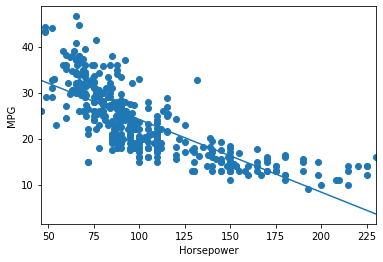

In [7]:
fig = sm.graphics.abline_plot(model_results=fitted_model)
ax = fig.axes[0]
ax.scatter(X['horsepower'], Y)
ax.set_ylabel('MPG')
ax.set_xlabel('Horsepower')
plt.show()

<div class="alert alert-block alert-info">
<span style="color:#000066"><b> 8.C. Use the plot() function to produce diagnostic plots of the least squares regression fit. Comment on any problems you see with the fit.</span>

In [8]:
def plot_resid_diagnostics(model):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,20))
    plt.style.use('seaborn')
    #residual vs fitted
    residuals = model.resid
    fitted = model.fittedvalues
    smoothed = lowess(residuals,fitted)
    axes[0,0].scatter(fitted, residuals, edgecolors = 'k', facecolors = 'none')
    axes[0,0].plot(smoothed[:,0],smoothed[:,1],color = 'r')
    axes[0,0].set_ylabel('Residuals')
    axes[0,0].set_xlabel('Fitted Values')
    axes[0,0].set_title('Residuals vs. Fitted')
    axes[0,0].plot([min(fitted),max(fitted)],[0,0],color = 'k',linestyle = ':', alpha = .3)
    #leverage vs residual : influence plot
    plot_leverage_resid2(model, ax = axes[0,1])
    #qqplot
    sm.qqplot(residuals, dist=stats.t, fit=True, line='45',
            ax=axes[1, 0], c='#4C72B0')
    axes[1, 0].set_title('Normal Q-Q')
    # The scale-location plot.
    axes[1,1].scatter(fitted, model.resid_pearson)
    axes[1, 1].axhline(y=0, color='grey', linestyle='dashed')
    axes[1, 1].set_xlabel('Fitted values')
    axes[1, 1].set_ylabel('Sqrt(|standardized residuals|)')
    axes[1, 1].set_title('Scale-Location')
    #plt.tight_layout()
    plt.show()

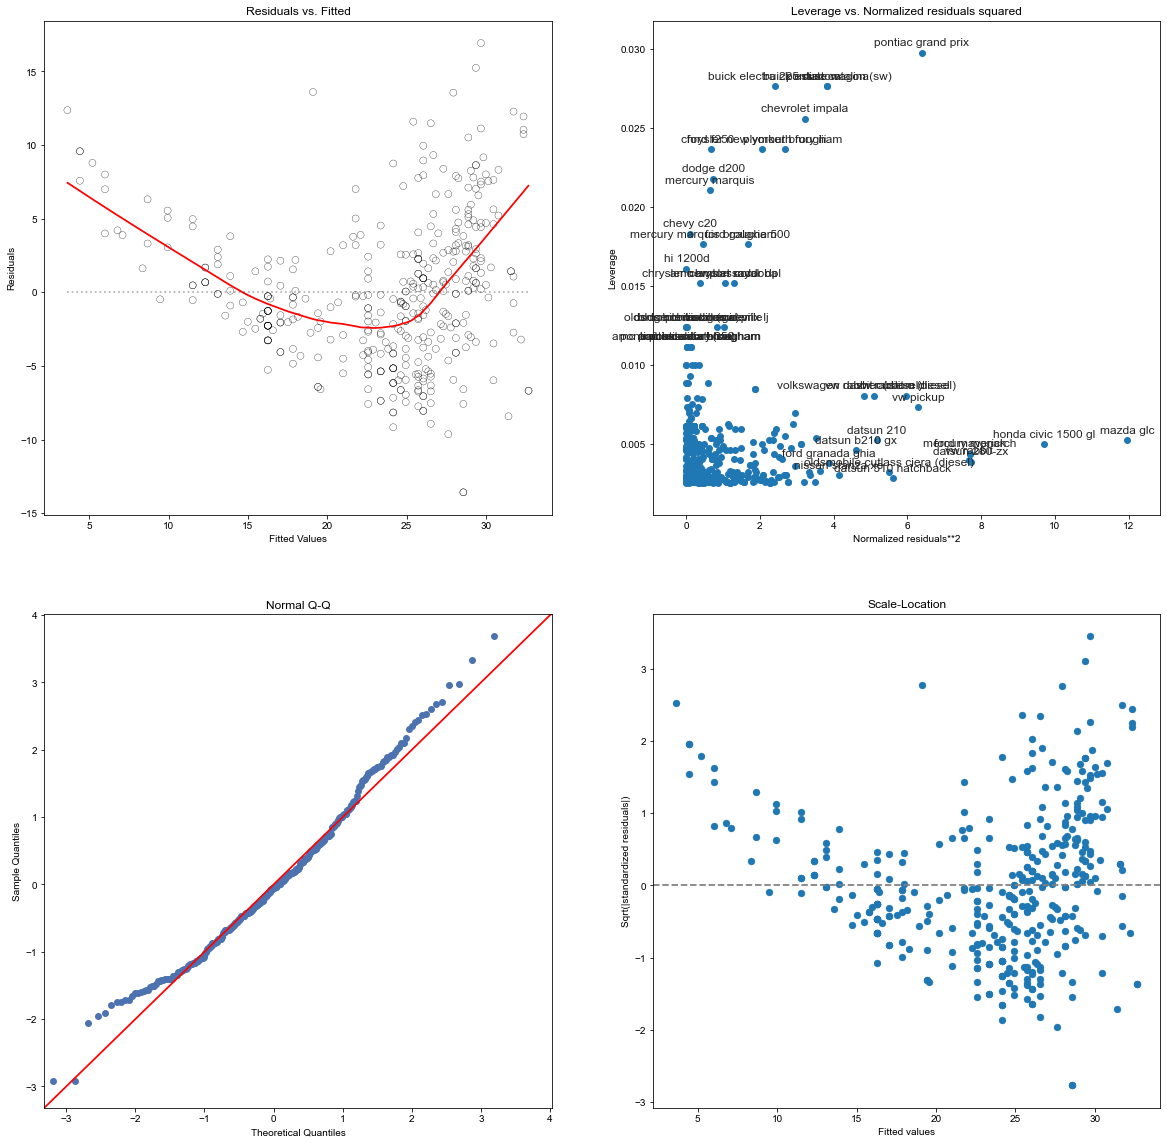

In [9]:
plot_resid_diagnostics(fitted_model)

<div class="alert alert-block alert-warning">
<span style="color:#000066">
    <b>INTERPRETATION</b>

Residual vs Fitted:
    
Clearly the residual plot depicts that there is a non-linear relation existing betweeen the predictor and the response which has not been considered in our proposed linear  model </span>

Influence plot:

Pontiac Grand prix is both a high leverage and high residual point. such a point will have a high impact of the stability of the modelas the coefficients are prone to change upon its removal. There are few other outlier points observedin the chart. But these tends to have low leverage and hence it is expected to not have a huge infleuce on the model stability
    
QQ Plot:
Presence of outliers observed at both the extremities as the quantiles diverge away from the line. A normality test is required to be performed to confimr the assumpotion of normality of error terms
    
Fitted vs sqrt(std residuals):

Because of the non linearity presence in relationship between response and predictors, we observe that the variance of error terms is not a constant independent of the predictor. There seems to be evidence of heteroscedasticity


#### <span style="color:#000066">QUESTION 9 : AUTO dataset</span> 

<div class="alert alert-block alert-info">
<span style="color:#000066"><b> 9.A. Produce a scatterplot matrix which includes all of the variables in the data set.</span></b>

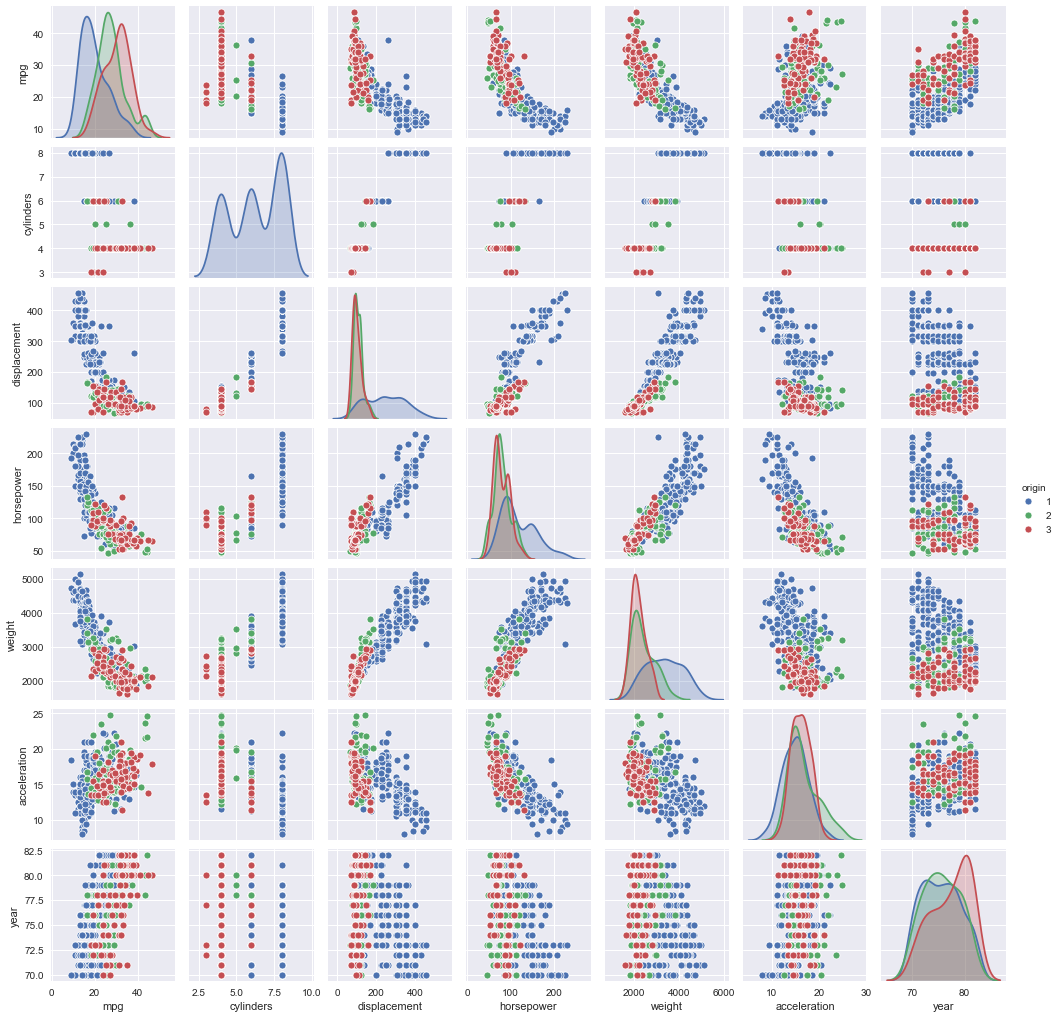

In [10]:
sns.pairplot(auto_data, size = 2.0, hue="origin")

<div class="alert alert-block alert-info">
<span style="color:#000066"><b> 9.B. Compute the matrix of correlations between the variables using the function cor(). You will need to exclude the name variable, cor() which is qualitative.</span></b>

In [11]:
auto_data.corr()

mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
year          0.580541  -0.345647     -0.369855   -0.416361 -0.309120   
origin        0.565209  -0.568932     -0.614535   -0.455171 -0.585005   

              acceleration      year    origin  
mpg               0.423329  0.580541  0.565209  
cylinders        -0.504683 -0.345647 -0.568932  
displacement     -0.543800 -0.369855 -0.614535  
horsepower       -0.689196 -0.416361 -0.455171  
weight           -0.416839 -0.309120 -0.585005  
acceleration      1.000000  0.290316  0.212746  
year              0.290316  1.000000  0.181528  
origin            0.212746  0.181528  1.000000

<div class="alert alert-block alert-info">
<span style="color:#000066"><b> 9.C. Use the lm() function to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Use the summary() function to print the results.Comment on the output.</span></b>

In [12]:
Y = auto_data['mpg']
X = auto_data.drop(['mpg'], axis=1)
X =  sm.add_constant(X)
fitted_model_mlr = sm.OLS(Y,X).fit()
fitted_model_mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Thu, 19 Nov 2020   Prob (F-statistic):          2.04e-139
Time:                        22:28:49   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<div class="alert alert-block alert-warning">
<span style="color:#000066">
    <b>INTERPRETATION</b>
p-value of F-stat < 0.05. Hence at 5% significance level, we can say atleast one of the predictors have a relationship with the response and the model eplains 80% variation if response variable. According to p-value of t-stats associated with each variables, except for cylinders, horsepower and acceleration, every other predictor is statistically significant  

<div class="alert alert-block alert-info">
<span style="color:#000066"><b> 9.C.i. Is there a relationship between the predictors and the response? </span></b>

p-value of F-stat <0.05. Hence at a 5% significant level, not all $\beta$s are zero and we can say that atleast one of the predictor exhibits a relationship with the response variable

<div class="alert alert-block alert-info">
<span style="color:#000066"><b> 9.C.ii. Which predictors appear to have a statistically significant relationship to the response?</span></b>

At 5% significance level, all except, cylinder, horsepower and acceleration seems to be statistically significant

<div class="alert alert-block alert-info">
<span style="color:#000066"><b> 9.C.iii What does the coefficient for the year variable suggest? </span></b>

The milage(mpg) changes(increases/decreases) on a average by 0.7508 units as each year goes up/down

<div class="alert alert-block alert-info">
<span style="color:#000066"><b> 9.D. Use the plot() function to produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage </span></b>

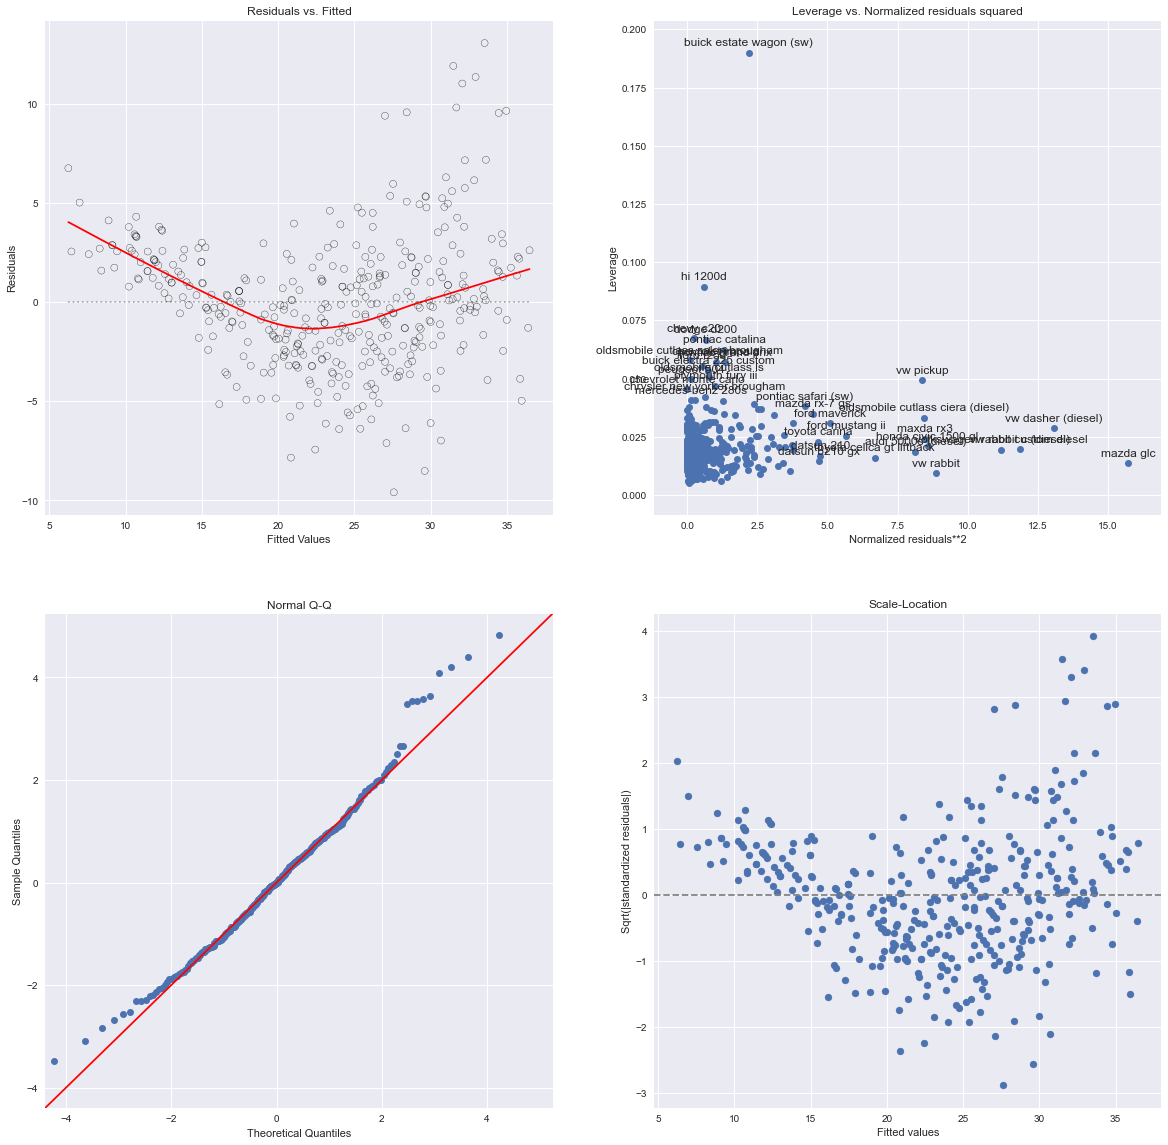

In [13]:
plot_resid_diagnostics(fitted_model_mlr)

<div class="alert alert-block alert-warning">
    <b> INTERPRETATION </b>

Residual vs Fitted:

The residual plot still depicts a non-linear relation existing betweeen some predictors and the response which has not been considered in our proposed linear  model. 

Residual vs Leverage:

Also from the leverage plot, we can find that 'buick estate wagon' has a high leverage. Generally a point with a high leverage can cause the stability of model to shatter. However in this case, the residual appears to be low and hence we can assume that the impact will be tolerable. Also if the data point is a one off case, we  can ignore this point.

QQ-Plot

In the case of QQ plot, we find that the middle bunch of points fall flat of the line. However due to the presence of extreme values in our dataset, there is a tendency at both the ends to fall away from the line thus violating the normality rule. However to test the significance of this, we need to conduct a statistical normality test and QQ plots are just visual references 

<div class="alert alert-block alert-info">
<span style="color:#000066"><b>  9.E. Use the * and : symbols to fit linear regression models with interaction effects. Do any interactions appear to be statistically significant? </span></b>

In [14]:
int_model = smf.ols(formula='mpg ~ (cylinders + displacement+horsepower+weight+acceleration+year+origin)**2', 
                    data=auto_data).fit()
int_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     104.2
Date:                Thu, 19 Nov 2020   Prob (F-statistic):          4.01e-155
Time:                        22:28:50   Log-Likelihood:                -929.72
No. Observations:                 392   AIC:                             1917.
Df Residuals:                     363   BIC:                             2033.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    35.4789     53.136      0.668      0.505     -69.014     139.972
cylinders                     6.9886      8.248      0.847      0.397      -9.231      23.208
displacement                 -0.4785      0.189     -2.527      0.012      -0.851      -0.106
horsepower                    0.5034      0.347      1.451      0.148      -0.179       1.186
weight                        0.0041      0.018      0.235      0.814      -0.030       0.039
acceleration                 -5.8592      2.174     -2.696      0.007     -10.134      -1.585
year                          0.6974      0.610      1.144      0.253      -0.501       1.896
origin                      -20.8956      7.097     -2.944      0.003     -34.852      -6.939
cylinders:displacement       -0.0034      0.006     -0.524      0.601      -0.016       0.009
cylinders:horsepower          0.0116      0.024      0.480      0.632      -0.036       0.059
cylinders:weight              0.0004      0.001      0.399      0.690      -0.001       0.002
cylinders:acceleration        0.2779      0.166      1.670      0.096      -0.049       0.605
cylinders:year               -0.1741      0.097     -1.793      0.074      -0.365       0.017
cylinders:origin              0.4022      0.493      0.816      0.415      -0.567       1.371
displacement:horsepower   -8.491e-05      0.000     -0.294      0.769      -0.001       0.000
displacement:weight        2.472e-05   1.47e-05      1.682      0.093   -4.18e-06    5.36e-05
displacement:acceleration    -0.0035      0.003     -1.041      0.299      -0.010       0.003
displacement:year             0.0059      0.002      2.482      0.014       0.001       0.011
displacement:origin           0.0240      0.019      1.232      0.219      -0.014       0.062
horsepower:weight         -1.968e-05   2.92e-05     -0.673      0.501   -7.72e-05    3.78e-05
horsepower:acceleration      -0.0072      0.004     -1.939      0.053      -0.015       0.000
horsepower:year              -0.0058      0.004     -1.482      0.139      -0.014       0.002
horsepower:origin             0.0022      0.029      0.076      0.939      -0.055       0.060
weight:acceleration           0.0002      0.000      1.025      0.306      -0.000       0.001
weight:year                  -0.0002      0.000     -1.056      0.292      -0.001       0.000
weight:origin                -0.0006      0.002     -0.364      0.716      -0.004       0.003
acceleration:year             0.0556      0.026      2.174      0.030       0.005       0.106
acceleration:origin           0.4583      0.157      2.926      0.004       0.150       0.766
year:origin                   0.1393      0.074      1.882      0.061      -0.006       0.285
===========================================================================

<div class="alert alert-block alert-warning">
<span style="color:#000066">
    <b>INTERPRETATION</b>
In the above table, all those variables which donot have a p-value<0.05 are all statistically nonsignificant

<div class="alert alert-block alert-info">
<span style="color:#000066"><b> 9.F. Try a few different transformations of the variables, such as log(X),√X, X2. Comment on your findings </span></b>

####  Question 10 
<div class="alert alert-block alert-info">
<span style="color:#000066"><b> This question should be answered using the Carseats data set.</span>

In [15]:
carseats_data = pandas.read_csv('carseats.csv')
carseats_data.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

<div class="alert alert-block alert-info">
<span style="color:#000066"><b> 10.A : Fit a multiple regression model to predict Sales using Price, Urban, and US </span></b>

In [16]:
car_model = smf.ols(formula='Sales ~ (Urban+US+Price)', 
                    data=carseats_data).fit()
car_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Thu, 19 Nov 2020   Prob (F-statistic):           2.39e-23
Time:                        22:28:50   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036      0.000      11.764      14.323
Urban[T.Yes]    -0.0219      0.272     -0.081      0.936      -0.556       0.512
US[T.Yes]        1.2006      0.259      4.635      0.000       0.691       1.710
Price           -0.0545      0.005    -10.389      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<div class="alert alert-block alert-warning">
<span style="color:#000066">
    <b>INTERPRETATION</b>
Urban seems to non-significant as its p-value is greate than 5% significance level

<div class="alert alert-block alert-info">
<span style="color:#000066"><b> 10.B Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative! </span></b>

Intercept represents the  base sales that is expected is 13.04 in the absence of fatcors like Price, whether urban or not, US or not.  The coefficient of US which is a qualitative variable is statistically significant at 5% suggesting that whther location is US or not has an impact on the Sales value. If the location is US, the average sales is expected to go up by 1.2 units additionally. The coefficient of price suggests that a per unit increase in price will cause the sales to drop by 0.054 units on an average

<div class="alert alert-block alert-info">
<span style="color:#000066"><b> 10.C. Write out the model in equation form, being careful to handle the qualitative variables properly.</span></b>

Sales = (13.0435 + 1.2006) + (-0.0545*Price) , if US

Sales = (13.0435) + (-0.0545*Price) , if not US

<div class="alert alert-block alert-info">
<span style="color:#000066"><b> 10.D. For which of the predictors can you reject the null hypothesis H0 : $\beta_{j}$ = 0? </span> </b>

Price and US as their p-values are less than 5% significance value

<div class="alert alert-block alert-info">
<span style="color:#000066"><b>10.E. On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.</span></b>

In [17]:
car_model = smf.ols(formula='Sales ~ (US+Price)', 
                    data=carseats_data).fit()
car_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Thu, 19 Nov 2020   Prob (F-statistic):           2.66e-24
Time:                        22:28:51   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.000      11.790      14.271
US[T.Yes]      1.1996      0.258      4.641      0.000       0.692       1.708
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<div class="alert alert-block alert-info">
<span style="color:#000066"><b> 10.E. How well do the models in (a) and (e) fit the data? </span></b>

Not much change as $R^{2}$ same

<div class="alert alert-block alert-info">
<span style="color:#000066"><b> 10.F. Using the model from (e), obtain 95% confidence intervals for the coefficient(s). </span></b>

In [18]:
car_model.conf_int()

0          1
Intercept  11.79032  14.271265
US[T.Yes]   0.69152   1.707766
Price      -0.06476  -0.044195

<div class="alert alert-block alert-info">
<span style="color:#000066"><b> 10.G. Is there evidence of outliers or high leverage observations in the model from (e)? </span></b>

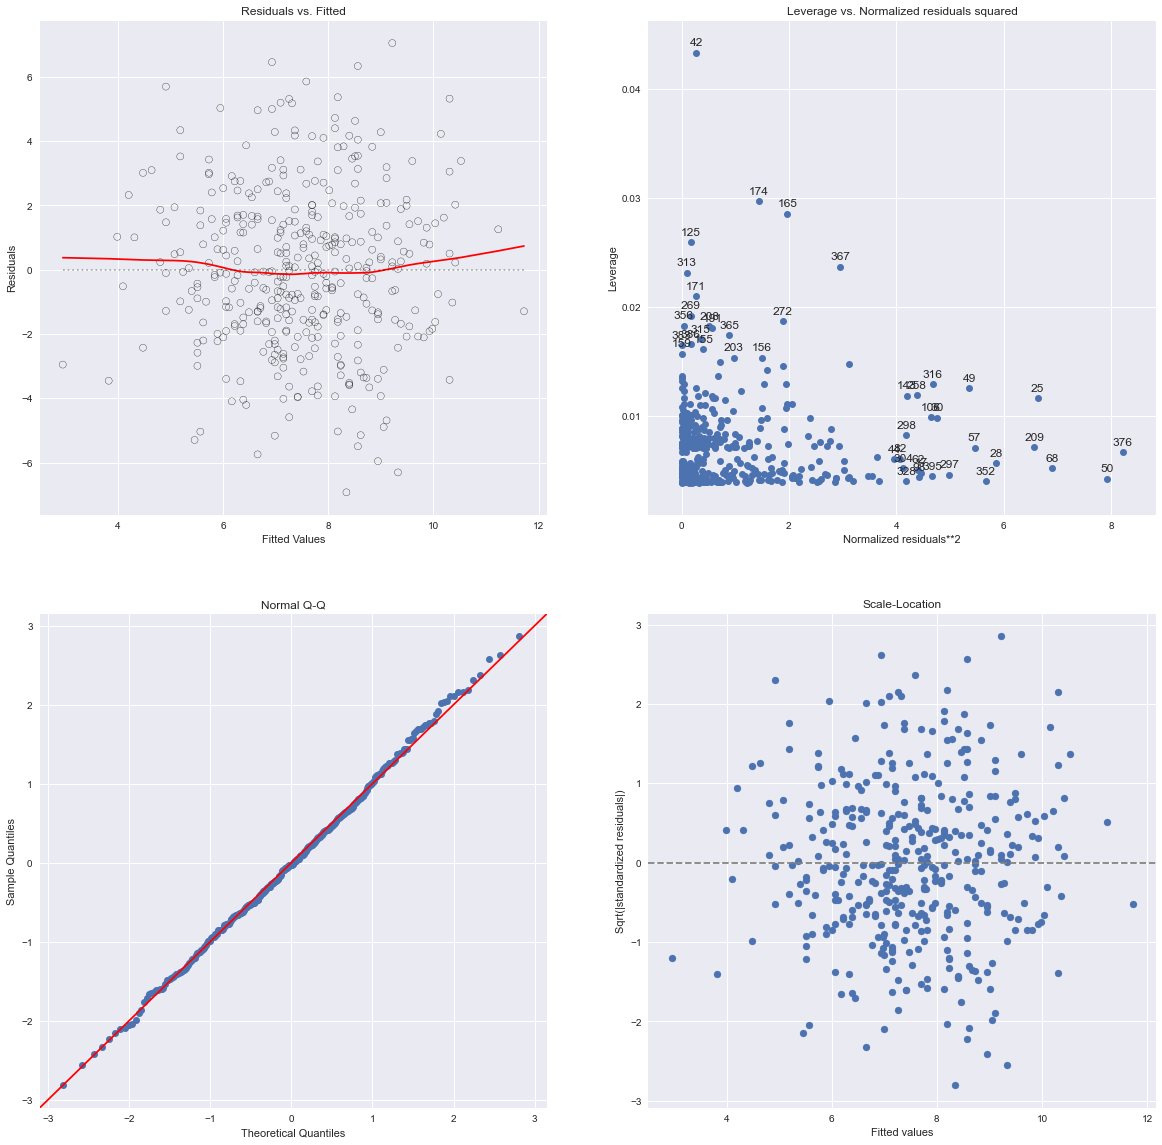

In [19]:
plot_resid_diagnostics(car_model)

<div class="alert alert-block alert-warning">
<span style="color:#000066">
    <b>INTERPRETATION</b>
Yes both high leverage points and high residuals are present in the data

<div class="alert alert-block alert-info">
<b> QUESTION 11 </b> 
In this problem we will investigate the t-statistic for the null hypothesis H0 : β = 0 in simple linear regression without an intercept. To begin, we generate a predictor x and a response y as follows

In [20]:
np.random.seed(10)
x = np.random.normal(size=100)
y = 2 * x * np.random.normal(size=100)

<div class="alert alert-block alert-info">
<b> 11.A. Perform a simple linear regression of y onto x, without an intercept. Report the coefficient estimate $\hat{\beta}$, the standard error of this coefficient estimate, and the t-statistic and p-value associated with the null hypothesis H0 : β = 0. Comment on these results. (You can perform regression without an intercept using the command lm(y∼x+0).)</b>

In [21]:
fitted_model_rand = sm.OLS(y,x).fit()
fitted_model_rand.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.001
Model:                            OLS   Adj. R-squared (uncentered):             -0.009
Method:                 Least Squares   F-statistic:                            0.08604
Date:                Thu, 19 Nov 2020   Prob (F-statistic):                       0.770
Time:                        22:28:51   Log-Likelihood:                         -209.71
No. Observations:                 100   AIC:                                      421.4
Df Residuals:                      99   BIC:                                      424.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0599      0.204      0.293      0.770      -0.345       0.465
==============================================================================
Omnibus:                       63.307   Durbin-Watson:                   1.638
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              568.110
Skew:                           1.772   Prob(JB):                    4.33e-124
Kurtosis:                      14.126   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<div class="alert alert-block alert-warning">
<b> INTERPRETATION:</b>     
X1 is statistically non-significant at a significance level of 5%. Further both p-value of Fstat as well as pvalue of t-stat of predictor states that there is no relationship between response and predictor

<div class="alert alert-block alert-info">
11.B. Now perform a simple linear regression of x onto y without an intercept, and report the coefficient estimate, its standard error, and the corresponding t-statistic and p-values associated with the null hypothesis H0 : β = 0. Comment on these results.

In [22]:
fitted_model_rand = sm.OLS(x,y).fit()
fitted_model_rand.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.001
Model:                            OLS   Adj. R-squared (uncentered):             -0.009
Method:                 Least Squares   F-statistic:                            0.08604
Date:                Thu, 19 Nov 2020   Prob (F-statistic):                       0.770
Time:                        22:28:51   Log-Likelihood:                         -138.83
No. Observations:                 100   AIC:                                      279.7
Df Residuals:                      99   BIC:                                      282.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0145      0.049      0.293      0.770      -0.084       0.113
==============================================================================
Omnibus:                        0.359   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.836   Jarque-Bera (JB):                0.073
Skew:                           0.003   Prob(JB):                        0.964
Kurtosis:                       3.133   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<div class="alert alert-block alert-warning">
<b> INTERPRETATION:</b> 
    
X1 is statistically non-significant at a significance level of 5%. Further both p-value of Fstat as well as pvalue of t-stat of predictor states that there is no relationship between response and predictor

<div class="alert alert-block alert-info"> <b> 11.C. What is the relationship between the results obtained in (a) and (b)?</b>

Coefficients and its associated standard errors are different in both the scenarios. Yet their t-stat tends to be same

11.D and 11.E - Theoritical

<div class="alert alert-block alert-info">
<b>11.F. In R, show that when regression is performed with an intercept, the t-statistic for H0 : β1 = 0 is the same for the regression of y onto x as it is for the regression of x onto y.</b> 

In [23]:
x1 =  sm.add_constant(x)
fitted_model_mlr = sm.OLS(y,x1).fit()
fitted_model_mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                   0.05647
Date:                Thu, 19 Nov 2020   Prob (F-statistic):              0.813
Time:                        22:28:51   Log-Likelihood:                -209.49
No. Observations:                 100   AIC:                             423.0
Df Residuals:                      98   BIC:                             428.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1311      0.199      0.658      0.512      -0.264       0.527
x1             0.0488      0.205      0.238      0.813      -0.359       0.456
==============================================================================
Omnibus:                       63.764   Durbin-Watson:                   1.647
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              577.210
Skew:                           1.786   Prob(JB):                    4.58e-126
Kurtosis:                      14.215   Cond. No.                         1.09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
y1 =  sm.add_constant(y)
fitted_model_mlr = sm.OLS(x,y1).fit()
fitted_model_mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                   0.05647
Date:                Thu, 19 Nov 2020   Prob (F-statistic):              0.813
Time:                        22:28:51   Log-Likelihood:                -138.51
No. Observations:                 100   AIC:                             281.0
Df Residuals:                      98   BIC:                             286.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0778      0.098      0.795      0.429      -0.116       0.272
x1             0.0118      0.050      0.238      0.813      -0.087       0.110
==============================================================================
Omnibus:                        0.351   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.839   Jarque-Bera (JB):                0.070
Skew:                           0.004   Prob(JB):                        0.966
Kurtosis:                       3.129   Cond. No.                         1.98
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Comments 
T-stat remains the same 

<b> QUESTION 12 </b>
<div class="alert alert-block alert-info"><b> This problem involves simple linear regression without an intercept. </b>

<div class="alert alert-block alert-info"><b> 12.A. Recall that the coefficient estimate $\hat{\beta}$ for the linear regression of Y onto X without an intercept is given by (3.38). Under what circumstance is the coefficient estimate for the regression of X onto Y the same as the coefficient estimate for the regression of Y onto X?</b>

When sum of squares of $x_{i}$ is same as sum of squares of $y_{i}$

<div class="alert alert-block alert-info"><b> 12.B. Generate an example in R with n = 100 observations in which the coefficient estimate for the regression of X onto Y is different from the coefficient estimate for the regression of Y onto X.</b>

Refer 11.F

<div class="alert alert-block alert-info"><b> 12.C. Generate an example in R with n = 100 observations in which the coefficient estimate for the regression of X onto Y is the same as the coefficient estimate for the regression of Y onto X.</b>

In [25]:
np.random.seed(1)
x = np.random.normal(size=100)
y = -x
mod_yx = sm.OLS(y, sm.add_constant(x)).fit()
mod_xy = sm.OLS(x, sm.add_constant(y)).fit()
mod_yx.params, mod_xy.params

(array([ 4.85722573e-17, -1.00000000e+00]),
 array([-4.85722573e-17, -1.00000000e+00]))

<b> QUESTION 13 </b>
<div class="alert alert-block alert-info"><b> In this exercise you will create some simulated data and will fit simple linear regression models to it. Make sure to use set.seed(1) prior to starting part (a) to ensure consistent results.</b>

<div class="alert alert-block alert-info"><b> 13.A. Using the rnorm() function, create a vector, x, containing 100 observations drawn from a N(0, 1) distribution. This represents a feature, X.</b>

In [26]:
np.random.seed(1000)
X = np.random.normal(size=100)

<div class="alert alert-block alert-info"><b>  13.B. Using the rnorm() function, create a vector, eps, containing 100 observations drawn from a N(0, 0.25) distribution i.e. a normal distribution with mean zero and variance 0.25.</b>

In [27]:
np.random.seed(1000)
eps = np.random.normal(size=100, loc=0, scale=0.25)

<div class="alert alert-block alert-info"><b>  13.C. Using x and eps, generate a vector y according to the model Y = −1 + 0.5X + e.  What is the length of the vector y? What are the values of $\beta_{0}$ and $\beta_{1}$ in this linear model?</b>

In [28]:
Y = -1+0.5*X+ np.random.normal(0, 1, 100)
len(Y)

100

$\beta_0$ = -1

$\beta_1$ = 0.5

<div class="alert alert-block alert-info"><b> 13.D. Create a scatterplot displaying the relationship between x and y. Comment on what you observe

In [29]:
fig = px.scatter(x=X, y=Y, labels = {'x':'X', 'y':'Y'}, title='Scatter Plot Y vs X',
                 trendline='ols', 
                 trendline_color_override='black',
                 template = 'ggplot2',
                )
fig.show()

<div class="alert alert-block alert-info"><b> 13.E. Fit a least squares linear model to predict y using x. Comment on the model obtained. How do $\hat{β_{0}}$ and $\hat{β_{1}}$ compare to $β_{0}$ and $β_{1}$? </b>

In [30]:
model_13 = sm.OLS(Y,sm.add_constant(X)).fit()
model_13.params

array([-1.19903316,  0.58817314])

<div class="alert alert-block alert-info"><b> 13.F. Display the least squares line on the scatterplot obtained in (d).Draw the population regression line on the plot, in a different color. Use the legend() command to create an appropriate legend.</b>

In [31]:
fig = go.Figure()
line = model_13.params[1]*X+model_13.params[0]
line_2 = 0.5*X+-1
fig.add_trace(go.Scatter(x=X, y=Y, mode= "markers", 
                         marker= {
                                    "size": 10, 
                                    "color": "rgb(214, 39, 40)", 
                                    "symbol": "diamond", 
                                  },
                          name="Scatter"))
fig.add_trace(go.Scatter(
                          x=X,
                          y=line,
                          mode='lines',
                          marker=go.Marker(color='rgb(31, 119, 180)'),
                          name='Least sqaure line'
                          ))
fig.add_trace(go.Scatter(
                          x=X,
                          y=line_2,
                          mode='lines',
                          marker=go.Marker(color='gold'),
                          name='Population line'
                          ))
fig.update_layout(template='plotly_white', showlegend=True)
fig.show()

C:\Users\srish\anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:434: DeprecationWarning:

plotly.graph_objs.Marker is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Marker
  - plotly.graph_objs.histogram.selected.Marker
  - etc.




<div class="alert alert-block alert-info"><b> 13.G. Now fit a polynomial regression model that predicts y using x and x2. Is there evidence that the quadratic term improves the model fit? Explain your answer.

In [32]:
datadf = pandas.DataFrame({'X':X,'Y':Y})
multi_reg = smf.ols(formula= 'Y~ X + np.power(X, 2)', data=datadf).fit()
multi_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     22.34
Date:                Thu, 19 Nov 2020   Prob (F-statistic):           1.05e-08
Time:                        22:28:52   Log-Likelihood:                -134.88
No. Observations:                 100   AIC:                             275.8
Df Residuals:                      97   BIC:                             283.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.2900      0.115    -11.198      0.000      -1.519      -1.061
X                  0.5583      0.092      6.036      0.000       0.375       0.742
np.power(X, 2)     0.0834      0.060      1.390      0.168      -0.036       0.203
==============================================================================
Omnibus:                        0.175   Durbin-Watson:                   1.834
Prob(Omnibus):                  0.916   Jarque-Bera (JB):                0.009
Skew:                           0.008   Prob(JB):                        0.995
Kurtosis:                       3.044   Cond. No.                         2.68
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
model_13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     42.35
Date:                Thu, 19 Nov 2020   Prob (F-statistic):           3.26e-09
Time:                        22:28:52   Log-Likelihood:                -135.87
No. Observations:                 100   AIC:                             275.7
Df Residuals:                      98   BIC:                             280.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1990      0.095    -12.588      0.000      -1.388      -1.010
x1             0.5882      0.090      6.508      0.000       0.409       0.768
==============================================================================
Omnibus:                        0.251   Durbin-Watson:                   1.796
Prob(Omnibus):                  0.882   Jarque-Bera (JB):                0.045
Skew:                          -0.038   Prob(JB):                        0.978
Kurtosis:                       3.071   Cond. No.                         1.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Slight improvemnt in $R^{2}$

<div class="alert alert-block alert-info"><b> 13.H. Repeat (a)–(f) after modifying the data generation process insuch a way that there is less noise in the data. The model (3.39) should remain the same. You can do this by decreasing the variance of the normal distribution used to generate the error term in (b). Describe your results.

In [34]:
New_Y = -1 + 0.5*X + np.random.normal(0,0.025,100)
model_13_new = sm.OLS(New_Y,sm.add_constant(X)).fit()
model_13_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 3.771e+04
Date:                Thu, 19 Nov 2020   Prob (F-statistic):          1.50e-128
Time:                        22:28:52   Log-Likelihood:                 219.78
No. Observations:                 100   AIC:                            -435.6
Df Residuals:                      98   BIC:                            -430.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0041      0.003   -369.365      0.000      -1.009      -0.999
x1             0.5009      0.003    194.187      0.000       0.496       0.506
==============================================================================
Omnibus:                        0.783   Durbin-Watson:                   2.204
Prob(Omnibus):                  0.676   Jarque-Bera (JB):                0.860
Skew:                          -0.096   Prob(JB):                        0.651
Kurtosis:                       2.588   Cond. No.                         1.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
fig = go.Figure()
line = model_13_new.params[1]*X+model_13_new.params[0]
line_2 = 0.5*X+-1
fig.add_trace(go.Scatter(x=X, y=New_Y, mode= "markers", 
                         marker= {
                                    "size": 5, 
                                    "color": "rgb(214, 39, 40)", 
                                    "symbol": "diamond", 
                                  },
                          name="Scatter"))
fig.add_trace(go.Scatter(
                          x=X,
                          y=line,
                          mode='lines',
                          marker=go.Marker(color='rgb(31, 119, 180)'),
                          name='Least sqaure line'
                          ))
fig.add_trace(go.Scatter(
                          x=X,
                          y=line_2,
                          mode='lines',
                          marker=go.Marker(color='gold'),
                          name='Population line'
                          ))
fig.update_layout(template='plotly_white', showlegend=True)
fig.show()

<div class="alert alert-block alert-info"><b> 13.I. Repeat (a)–(f) after modifying the data generation process in such a way that there is more noise in the data. The model(3.39) should remain the same. You can do this by increasing the variance of the normal distribution used to generate the error term in (b). Describe your results

In [36]:
Noise_Y = -1 + 0.5*X + np.random.normal(0,1.25,100)
model_13_noise = sm.OLS(Noise_Y,sm.add_constant(X)).fit()
model_13_noise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     10.91
Date:                Thu, 19 Nov 2020   Prob (F-statistic):            0.00134
Time:                        22:28:52   Log-Likelihood:                -154.16
No. Observations:                 100   AIC:                             312.3
Df Residuals:                      98   BIC:                             317.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9163      0.114     -8.013      0.000      -1.143      -0.689
x1             0.3584      0.109      3.303      0.001       0.143       0.574
==============================================================================
Omnibus:                        0.483   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.785   Jarque-Bera (JB):                0.614
Skew:                          -0.145   Prob(JB):                        0.736
Kurtosis:                       2.749   Cond. No.                         1.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
fig = go.Figure()
line = model_13_noise.params[1]*X+model_13_noise.params[0]
line_2 = 0.5*X+-1
fig.add_trace(go.Scatter(x=X, y=Noise_Y, mode= "markers", 
                         marker= {
                                    "size": 5, 
                                    "color": "rgb(214, 39, 40)", 
                                    "symbol": "diamond", 
                                  },
                          name="Scatter"))
fig.add_trace(go.Scatter(
                          x=X,
                          y=line,
                          mode='lines',
                          marker=go.Marker(color='rgb(31, 119, 180)'),
                          name='Least sqaure line'
                          ))
fig.add_trace(go.Scatter(
                          x=X,
                          y=line_2,
                          mode='lines',
                          marker=go.Marker(color='gold'),
                          name='Population line'
                          ))
fig.update_layout(template='plotly_white', showlegend=True)
fig.show()

<div class="alert alert-block alert-info"><b> 13.J. What are the confidence intervals for $\beta_{0}$ and $\beta_{1}$ based on the original data set, the noisier data set, and the less noisy data set? Comment on your results.

In [38]:
pandas.DataFrame(model_13.conf_int(alpha=0.05), columns=['LB','UB'])

LB        UB
0 -1.388051 -1.010015
1  0.408813  0.767534

In [39]:
pandas.DataFrame(model_13_new.conf_int(alpha=0.05), columns=['LB','UB'])

LB        UB
0 -1.009448 -0.998659
1  0.495772  0.506010

In [40]:
pandas.DataFrame(model_13_noise.conf_int(alpha=0.05), columns=['LB','UB'])

LB        UB
0 -1.143290 -0.689391
1  0.143063  0.573771

<b> QUESTION 14 </b>
<div class="alert alert-block alert-info"><b> Perform the following commands. </b>

In [42]:
np.random.seed(1)
x1 = np.random.uniform(size = (100,))
x2 =0.5* x1+ np.random.normal(size=100)/10
y=2+2* x1+0.3* x2+np.random.normal(size=100)
data_q14 = pandas.DataFrame({'Y':y, 'X1':x1,'X2':x2})
data_q14

Y        X1        X2
0   2.949735  0.417022  0.240074
1   3.261717  0.720324  0.157942
2   3.322517  0.000114 -0.030563
3   2.387546  0.302333  0.233964
4   3.002498  0.146756  0.096387
..       ...       ...       ...
95  1.719446  0.237027 -0.071123
96  4.758863  0.903380  0.386998
97  4.803815  0.573679  0.376988
98  2.840827  0.002870  0.254268
99  4.204311  0.617145  0.283709

[100 rows x 3 columns]

<div class="alert alert-block alert-info"><b> 1.4.A. The last line corresponds to creating a linear model in which y is a function of x1 and x2. Write out the form of the linear model. What are the regression coefficients?

coeff are 2 and 0.3

<div class="alert alert-block alert-info"><b> 14.B. What is the correlation between x1 and x2? Create a scatterplot displaying the relationship between the variables

In [43]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x1, y=x2, mode= "markers", 
                         marker= {
                                    "size": 5, 
                                    "color": "rgb(214, 39, 40)", 
                                    "symbol": "diamond", 
                                  },
                          name="Scatter"))
fig.update_layout(template='plotly_white', showlegend=True)
fig.show()

<div class="alert alert-block alert-info"><b> 14.C. Using this data, fit a least squares regression to predict y using x1 and x2. Describe the results obtained. What are $\hat{\beta_0}$,$\hat{\beta_1}$, and $\hat{\beta_2}$ How do these relate to the true ${\beta_0}$, ${\beta_1}$, and ${\beta_2}$? Can youreject the null hypothesis H0 : $\beta_1$ = 0? How about the nullhypothesis H0 : $\beta_2$= 0?

In [46]:
model_q14 = smf.ols(formula= 'Y~ X1 + X2 ', data=data_q14).fit()
model_q14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     17.09
Date:                Thu, 19 Nov 2020   Prob (F-statistic):           4.40e-07
Time:                        22:30:38   Log-Likelihood:                -142.34
No. Observations:                 100   AIC:                             290.7
Df Residuals:                      97   BIC:                             298.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1893      0.199     11.021      0.000       1.795       2.584
X1             0.7046      0.637      1.107      0.271      -0.559       1.968
X2             2.5024      1.140      2.194      0.031       0.239       4.766
==============================================================================
Omnibus:                        0.607   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.738   Jarque-Bera (JB):                0.577
Skew:                          -0.179   Prob(JB):                        0.749
Kurtosis:                       2.900   Cond. No.                         14.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<div class="alert alert-block alert-warning">
<b> INTERPRETATION:</b> 
Null hypothesis $\beta_1$ = 0 cannot be rejected as the p-value is greater than 5% significance level. This is an evidence supportoring Null $\beta_1$ = 0. However null hypothsis $\beta_2$ = 0 can be rejected as the test p-values is less tha 5% significance level

<div class="alert alert-block alert-info"><b> 14.D. Now fit a least squares regression to predict y using only x1. Comment on your results. Can you reject the null hypothesis $H_0$ : $\beta_1$ = 0?

In [53]:
model_q14_D = smf.ols(formula= 'Y~ X1 ', data=data_q14).fit()
model_q14_D.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     28.26
Date:                Thu, 19 Nov 2020   Prob (F-statistic):           6.68e-07
Time:                        22:42:47   Log-Likelihood:                -144.76
No. Observations:                 100   AIC:                             293.5
Df Residuals:                      98   BIC:                             298.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2486      0.201     11.209      0.000       1.850       2.647
X1             1.8770      0.353      5.316      0.000       1.176       2.578
==============================================================================
Omnibus:                        0.292   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.864   Jarque-Bera (JB):                0.468
Skew:                          -0.003   Prob(JB):                        0.791
Kurtosis:                       2.665   Cond. No.                         4.26
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<div class="alert alert-block alert-warning">
<b> INTERPRETATION:</b> 
This time null hypothsis $\beta_1$ = 0 can be rejected as the test p-values is less tha 5% significance level. One possible reason can be multicollinearity which we can test out through an analysis of VIF 

<div class="alert alert-block alert-info"><b> 14.E.  Now fit a least squares regression to predict y using only x2. Comment on your results. Can you reject the null hypothesis H0 : $\beta_1$ = 0?

In [54]:
model_q14_E = smf.ols(formula= 'Y~ X2 ', data=data_q14).fit()
model_q14_E.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     32.87
Date:                Thu, 19 Nov 2020   Prob (F-statistic):           1.09e-07
Time:                        22:42:49   Log-Likelihood:                -142.97
No. Observations:                 100   AIC:                             289.9
Df Residuals:                      98   BIC:                             295.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2655      0.187     12.145      0.000       1.895       2.636
X2             3.5613      0.621      5.733      0.000       2.329       4.794
==============================================================================
Omnibus:                        0.857   Durbin-Watson:                   2.117
Prob(Omnibus):                  0.651   Jarque-Bera (JB):                0.746
Skew:                          -0.210   Prob(JB):                        0.689
Kurtosis:                       2.946   Cond. No.                         6.48
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<div class="alert alert-block alert-warning">
<b> INTERPRETATION:</b> 
Null hypothesis $\beta_1$ = 0 cannot be rejected as the p-value is greater than 5% significance level. This is an evidence support Null. However null hypothsis $\beta_2$ = 0 can be rejected as the test p-values is less tha 5% significance level
X2 is still significant at significance level of 5%

<div class="alert alert-block alert-info"><b> 14.F.  Do the results obtained in (c)–(e) contradict each other? Explain your answer.

<div class="alert alert-block alert-warning">
<b> INTERPRETATION:</b> 
When we generated x2, it was obtained as a linear equation of x1. Also in the scatter plot we can see the high level of correlation existing between  the two variable. Hence x1and x2 are correlated which makes model in question 14.C suffer from multicollinerity. Hence x2 is statistically significant while x1 is not so. 
    
However when we independently model them in seperate models, each of the variables will become significant which we observe in 14.d and 14.e

<div class="alert alert-block alert-info"><b> 14.G.  Now suppose we obtain one additional observation, which was unfortunately mismeasured - To DO

QUESTION 15
<div class="alert alert-block alert-info"><b> 15. This problem involves the Boston data set, which we saw in the labfor this chapter. We will now try to predict per capita crime rate using the other variables in this data set. In other words, per capita crime rate is the response, and the other variables are the predictors  

<div class="alert alert-block alert-info"><b> 15.A. For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions.

In [97]:
import sklearn
from sklearn.datasets import load_boston
boston_dataset = load_boston()
boston_data = pandas.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston_data

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3       18.7  394.63   2.94  
4       18.7  396.90   5.33  
..       ...     ...    ...  
501     21.0  391.99   9.67  
502     21.0  396.90   9.08  
503     21.0  396.90   5.64  
504     21.0  393.45   6.48  
505     21.0  396.90   7.88  

[506 rows x 13 columns]

In [98]:
model_dict = {}
cols = list(boston_data.columns)
cols.remove('CRIM')
for var in cols:
    model_dict[var+'_model']= model_13_noise = sm.OLS(boston_data['CRIM'],sm.add_constant(boston_data[var])).fit()
    print(model_dict[var+'_model'].summary())

                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     21.10
Date:                Thu, 19 Nov 2020   Prob (F-statistic):           5.51e-06
Time:                        23:11:30   Log-Likelihood:                -1796.0
No. Observations:                 506   AIC:                             3596.
Df Residuals:                     504   BIC:                             3604.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4537      0.417     10.675      0.0

In [99]:
pvalues_df = pandas.DataFrame(columns=['p-value'])
for var in cols:
    pvalues_df.loc[var,'p-value'] = model_dict[var+'_model'].pvalues[var]
pvalues_df

p-value
ZN       5.50647e-06
INDUS    1.45035e-21
CHAS        0.209435
NOX      3.75174e-23
RM        6.3467e-07
AGE      2.85487e-16
DIS      8.51995e-19
RAD      2.69384e-56
TAX      2.35713e-47
PTRATIO  2.94292e-11
B        2.48727e-19
LSTAT    2.65428e-27

<div class="alert alert-block alert-warning">
<b> INTERPRETATION:</b> 
As we can see above all the p-values are less tha 0.05. Hence at a 5% significance level, we can reject the null hypothesis in each case and say each of these variables are statistically significant in their simple linear model state

<div class="alert alert-block alert-info"><b> 15B.  Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For For which predictors can we reject the null hypothesis H0 : βj = 0?

In [103]:
model_15_A = sm.OLS(boston_data['CRIM'],sm.add_constant(boston_data.drop('CRIM', axis=1))).fit()
model_15_A.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CRIM   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     32.55
Date:                Thu, 19 Nov 2020   Prob (F-statistic):           4.84e-55
Time:                        23:18:33   Log-Likelihood:                -1658.8
No. Observations:                 506   AIC:                             3344.
Df Residuals:                     493   BIC:                             3398.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.9967      6.979      1.432      0.153      -3.716      23.709
ZN             0.0364      0.019      1.943      0.053      -0.000       0.073
INDUS         -0.0694      0.084     -0.825      0.410      -0.235       0.096
CHAS          -1.3117      1.179     -1.112      0.267      -3.629       1.005
NOX           -6.9288      5.225     -1.326      0.185     -17.195       3.338
RM            -0.3348      0.573     -0.585      0.559      -1.460       0.790
AGE            0.0013      0.018      0.074      0.941      -0.034       0.037
DIS           -0.7089      0.271     -2.612      0.009      -1.242      -0.176
RAD            0.5389      0.088      6.151      0.000       0.367       0.711
TAX           -0.0014      0.005     -0.263      0.793      -0.011       0.009
PTRATIO       -0.0834      0.179     -0.465      0.642      -0.436       0.269
B             -0.0096      0.004     -2.625      0.009      -0.017      -0.002
LSTAT          0.2356      0.069      3.431      0.001       0.101       0.371
==============================================================================
Omnibus:                      685.174   Durbin-Watson:                   1.511
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            97204.794
Skew:                           6.921   Prob(JB):                         0.00
Kurtosis:                      69.475   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

 <div class="alert alert-block alert-warning">
<b> INTERPRETATION:</b>  we can reject null hypothesis $\beta_j$ = 0  for all those variables whose p-value are less than 0.05 in above summary

<div class="alert alert-block alert-info"><b> 15.C. How do your results from (a) compare to your results from (b)? Create a plot displaying the univariate regression coefficients from (a) on the x-axis, and the multiple regression coefficients from (b) on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis

In [106]:
multi_df = pandas.DataFrame(model_15_A.pvalues, columns = ['multi_pvalues'])
multi_df = multi_df[1:]

In [109]:
merged_df = pvalues_df.join(multi_df, how = 'outer')
merged_df

p-value  multi_pvalues
ZN       5.50647e-06   5.263437e-02
INDUS    1.45035e-21   4.100531e-01
CHAS        0.209435   2.665431e-01
NOX      3.75174e-23   1.854409e-01
RM        6.3467e-07   5.589691e-01
AGE      2.85487e-16   9.408982e-01
DIS      8.51995e-19   9.287402e-03
RAD      2.69384e-56   1.597550e-09
TAX      2.35713e-47   7.925541e-01
PTRATIO  2.94292e-11   6.419989e-01
B        2.48727e-19   8.931725e-03
LSTAT    2.65428e-27   6.524119e-04

In [110]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=merged_df['p-value'], y=merged_df['multi_pvalues'], mode= "markers", 
                         marker= {
                                    "size": 5, 
                                    "color": "rgb(214, 39, 40)", 
                                    "symbol": "diamond", 
                                  },
                          name="Scatter"))
fig.update_layout(template='plotly_white', showlegend=True)
fig.show()